In [35]:
import numpy as np
import pandas as pd
import sys, os
import seaborn as sns
import viz.display as dp
from IPython.display import clear_output

### Load Data

In [36]:
df = pd.read_csv('D:/AlgoData/EURUSD_clean.csv').iloc[:, 1:]
raw = pd.read_csv('D:/TickData_Agg/EURUSD.csv')

In [37]:
raw.head()

,Datetime,Open,High,Low,Close,Volume
0,2009-05-01 00:00:00,1.324435,1.324645,1.324430,1.324645,554.982980
1,2009-05-01 00:03:00,1.324685,1.325350,1.324685,1.324925,400.169775
2,2009-05-01 00:06:00,1.324915,1.325370,1.324895,1.325305,239.854325
3,2009-05-01 00:09:00,1.325335,1.326040,1.324825,1.325410,702.527180
4,2009-05-01 00:12:00,1.325345,1.325725,1.324680,1.324715,288.898580


In [38]:
df.head()

,Datetime,Open,High,Low,Close,Dist10MA,Dist20MA,Dist50MA,Dist200MA,CBSpread,BB,RelVol
0,2009-07-24 00:00:00,0.999880,1.000229,1.000053,1.000251,1.000081,1.000076,1.000366,0.997283,1.099352,0.999996,0.683352
1,2009-07-24 00:03:00,1.000233,0.999873,0.999470,0.999291,0.999434,0.999404,0.999664,0.996597,1.361493,1.000002,0.926492
2,2009-07-24 00:06:00,0.999291,0.999636,1.000110,1.000350,0.999816,0.999775,1.000014,0.996969,1.121212,0.999992,0.747677
3,2009-07-24 00:09:00,1.000343,1.000060,0.999859,0.999640,0.999527,0.999454,0.999662,0.996635,1.184041,1.000008,0.769104
4,2009-07-24 00:12:00,0.999661,0.999633,0.999703,0.999781,0.999407,0.999286,0.999450,0.996442,1.116304,1.000008,0.762840


### Format Data For Bookkeeping

In [39]:
raw['OpenRaw'] = raw['Open']
raw['CloseRaw'] = raw['Close']
raw['HighRaw'] = raw['High']
raw['LowRaw'] = raw['Low']
raw = raw[['Datetime', 'OpenRaw', 'HighRaw', 'LowRaw', 'CloseRaw']]

In [40]:
df = df.merge(raw, how='outer', on='Datetime').dropna()

### Get Rolling Mean and STD of Closing Prices

In [41]:
df['STD'] = df.Close.rolling(window=20, min_periods=1).std()
df['Mean'] = df.Close.rolling(window=20, min_periods=1).mean()

### Extract all signal candles

In [42]:
cutoff = 3
longs = df[df.Close > cutoff*df.STD + df.Mean]
longs = longs[longs.STD != 0]
shorts = df[df.Close < df.Mean - cutoff*df.STD]
shorts = shorts[shorts.STD != 0]

In [43]:
'Num Longs', longs.shape[0]

('Num Longs', 3945)

In [44]:
'Num Shorts', shorts.shape[0]

('Num Shorts', 3731)

In [45]:
longs.head()

,Datetime,Open,High,Low,Close,Dist10MA,Dist20MA,Dist50MA,Dist200MA,CBSpread,BB,RelVol,OpenRaw,HighRaw,LowRaw,CloseRaw,STD,Mean
105,2009-07-24 05:15:00,1.000053,1.000600,1.000064,1.000569,1.000532,1.000433,1.000536,1.000472,1.136578,0.999997,0.928461,1.415835,1.416705,1.415750,1.416645,0.000179,1.000017
420,2009-07-24 21:00:00,1.000999,1.001052,1.001148,1.001475,1.000940,1.000817,1.000757,1.000250,1.125378,1.000003,0.875750,1.422300,1.422400,1.421700,1.422300,0.000379,1.000023
592,2009-07-27 05:36:00,0.999793,1.000861,1.000105,1.000952,1.000603,1.000749,1.001041,1.001868,1.277926,1.000005,0.821150,1.423065,1.424585,1.422965,1.424440,0.000268,1.000058
677,2009-07-27 09:51:00,0.999856,1.000764,1.000070,1.000936,1.000987,1.001290,1.001657,1.002968,1.247922,1.000002,0.834745,1.425985,1.427340,1.425950,1.427295,0.000275,1.000102
760,2009-07-27 14:00:00,1.000284,1.001302,1.000418,1.001326,1.001235,1.000929,1.000204,1.000975,1.167341,1.000007,0.862682,1.425060,1.426975,1.425060,1.426945,0.000399,1.000012


In [46]:
shorts.head()

,Datetime,Open,High,Low,Close,Dist10MA,Dist20MA,Dist50MA,Dist200MA,CBSpread,BB,RelVol,OpenRaw,HighRaw,LowRaw,CloseRaw,STD,Mean
371,2009-07-24 18:33:00,0.999937,1.000141,0.999378,0.999364,0.999164,0.998838,0.999183,0.999356,1.222069,1.000019,0.885975,1.422140,1.422440,1.421155,1.421220,0.000182,0.999931
480,2009-07-27 00:00:00,0.997989,0.997923,0.997661,0.997328,0.997595,0.997462,0.997382,0.997740,1.052857,1.000090,1.134156,1.419440,1.419445,1.418375,1.418500,0.000597,0.999866
751,2009-07-27 13:33:00,1.000140,1.000011,0.999484,0.999155,0.999271,0.998997,0.998299,0.999573,1.142433,0.999996,0.868184,1.426045,1.426140,1.424715,1.424850,0.000253,0.999963
1263,2009-07-28 15:09:00,1.000056,0.999866,0.998998,0.998797,0.998719,0.998844,0.997357,0.993285,1.292026,0.999983,0.993824,1.417215,1.417245,1.415455,1.415520,0.000340,0.999929
1780,2009-07-29 17:00:00,1.000082,0.999989,0.998589,0.998785,0.998734,0.998661,0.998098,0.993392,1.374343,1.000009,1.146567,1.403275,1.403330,1.401170,1.401565,0.000365,0.999902


### Visualize a Long and a Short

##### Long Candle / Short Signal

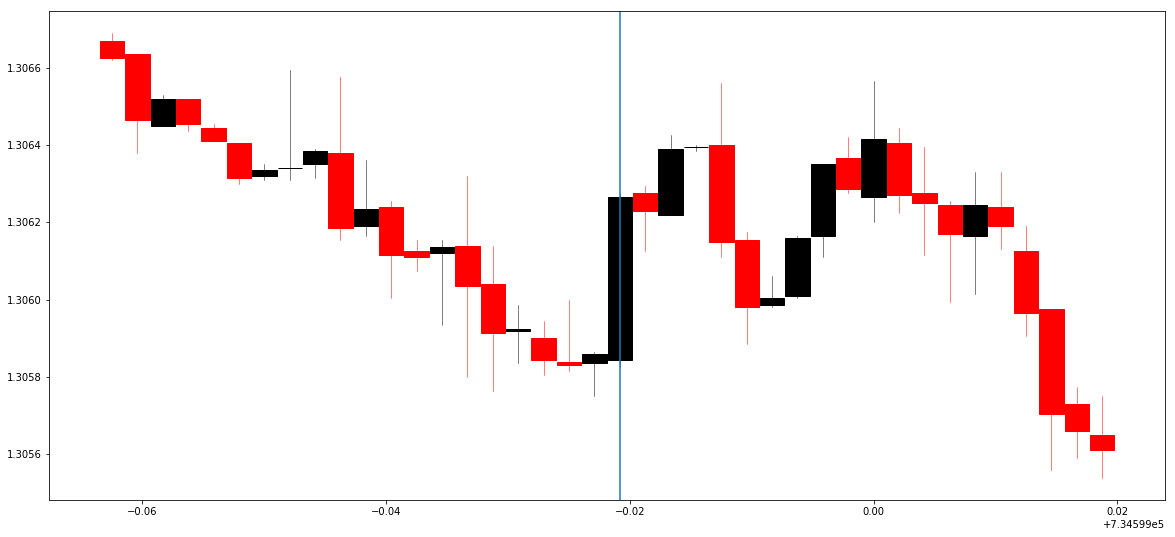

In [56]:
idx = df[df.Datetime == longs.Datetime.values[np.random.randint(0, longs.shape[0])]].index.values[0]
data = df.iloc[idx-20:idx+20, :][['Datetime', 'OpenRaw', 'HighRaw', 'LowRaw', 'CloseRaw']].values
dp.simple_ohlc(data, 20)

##### Short Candle / Long Signal

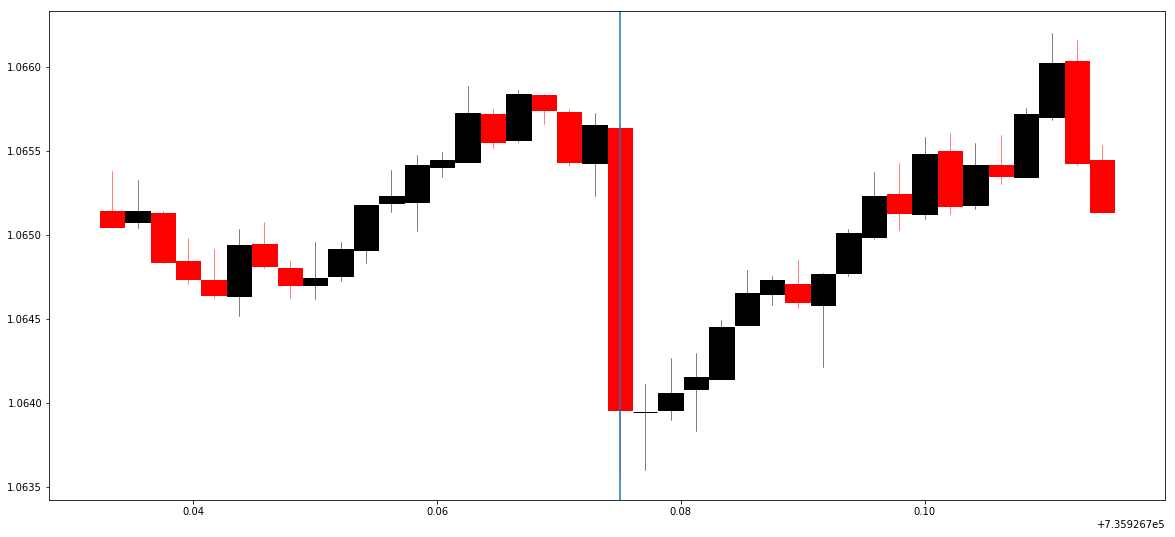

In [62]:
idx = df[df.Datetime == shorts.Datetime.values[np.random.randint(0, shorts.shape[0])]].index.values[0]
data = df.iloc[idx-20:idx+20, :][['Datetime', 'OpenRaw', 'HighRaw', 'LowRaw', 'CloseRaw']].values
dp.simple_ohlc(data, 20)

### Calculate Average TTC (Time-to-close)

##### Long Candle / Short Trade

In [64]:
def long_short_ttc(datetime, df):
    
    idx = df[df.Datetime == datetime].index.values[0]
    target = df.iloc[idx, :].OpenRaw
    close, low = np.inf, np.inf
    
    ctr = idx
    while close > target and low > target:
        idx += 1
        close = df.iloc[idx, :].CloseRaw
        low = df.iloc[idx, :].LowRaw
        if idx - ctr >= 100:
            break
    return idx - ctr

##### Short Candle / Long Trade

In [65]:
def short_long_ttc(datetime, df):
    
    idx = df[df.Datetime == datetime].index.values[0]
    target = df.iloc[idx, :].OpenRaw
    close, high = -np.inf, -np.inf
    
    ctr = idx
    while close < target and high < target:
        idx += 1
        close = df.iloc[idx, :].CloseRaw
        low = df.iloc[idx, :].HighRaw
        if idx - ctr >= 100:
            break
    return idx - ctr

### Get Average Time-To-Close on Longs

In [66]:
ttc_long = []
for i, datetime in enumerate(longs.Datetime):
    clear_output()
    print(i)
    ttc_long.append(long_short_ttc(datetime, df))

3944


In [67]:
ttc_longs = pd.DataFrame(ttc_long, columns=['TTC'])

In [68]:
ttc_longs.TTC.describe()

count    3945.000000
mean       40.715843
std        40.645216
min         1.000000
25%         5.000000
50%        20.000000
75%       100.000000
max       100.000000
Name: TTC, dtype: float64

### Get Average Time-To-Close on Shorts

In [25]:
ttc_short = []
for i, datetime in enumerate(shorts.Datetime):
    clear_output()
    print(i)
    ttc_short.append(short_long_ttc(datetime, df))

3730


In [26]:
ttc_shorts = pd.DataFrame(ttc_short, columns=['TTC'])

In [27]:
ttc_shorts.TTC.describe()

count    3731.000000
mean       47.131332
std        40.707383
min         1.000000
25%         8.000000
50%        32.000000
75%       100.000000
max       100.000000
Name: TTC, dtype: float64

In [43]:
np.quantile(ttc_short, 0.65)

74.0